# Project-1:
## Haberman Cancer survival data set - Exploratory data analysis

# Solution :-

## 1) Import Necessary Libraries
First off, we need to import several Python libraries such as numpy, pandas, matplotlib and seaborn.

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

 ## 2) Read in and Explore the Data 
It's time to read  data using `pd.read_csv`, and take a first look at the  data using the `describe()` function.

In [25]:
#import data CSV file
Haberman = pd.read_csv("C:/Users/Milan Joshi/Desktop/Apl_ai/Ex-1/haberman.csv")
# Number of Data Points and Features 
print(Haberman.shape)
# column names in our dataset
print (Haberman.columns)

(305, 4)
Index(['30', '64', '1', '1.1'], dtype='object')


 ## Observations :-
 There are 305 Rows and 4 columns in the Habermans Dataset i:e there are 305 data points and 4 features or Variables
 Above column names does not give any idea of measurements taken in data set ,
 so we use information of column names used on kaggle as follows
 30 -Age ; 64-Op_Year ;1-axil_nodes_det ;1.1-Surv_status , we will rename our data frame¶

In [26]:
# Renamimg data
Haberman.rename(columns={'30': 'age', '64': 'op_year', '1': 'axil_nodes','1.1':'surv_status'}, inplace=True)
# coding response variable
Haberman['surv_status'] = Haberman['surv_status'].apply(lambda y: 'survived' if y == 1 else 'died')

In [27]:
#see a sample of the dataset to get an idea of the variables
Haberman.sample(5)

,age,op_year,axil_nodes,surv_status
50,41,65,0,survived
209,58,61,1,survived
68,43,60,0,survived
87,45,67,1,survived
167,54,65,23,died


In [28]:
# Get  data type of variables
Haberman.dtypes

age             int64
op_year         int64
axil_nodes      int64
surv_status    object
dtype: object

## Observations : -
* **Numerical Features:** Age (int), OP_Year (int), axil_nodes(int)  :- input/independent variables
* **Categorical Features:** surve_state   :-is a class/response/predictor variable

Now that we have an idea of what kinds of features we're working with, we can see how much information we have about each of them.


In [29]:
# Now we describe the data 
Haberman.describe(include="all")

,age,op_year,axil_nodes,surv_status
count,305.000000,305.000000,305.000000,305
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,survived
freq,NaN,NaN,NaN,224
mean,52.531148,62.849180,4.036066,NaN
std,10.744024,3.254078,7.199370,NaN
min,30.000000,58.000000,0.000000,NaN
25%,44.000000,60.000000,0.000000,NaN
50%,52.000000,63.000000,1.000000,NaN
75%,61.000000,66.000000,4.000000,NaN


In [30]:
# Check is there any null values
Haberman.isnull().values.any()

False

In [39]:
#% count of both status survived and died in Surv_status
Haberman['surv_status'].value_counts()/len(Haberman.surv_status)*100

survived    73.442623
died        26.557377
Name: surv_status, dtype: float64

 ## Observations :-
  Data set has no missing values and data is not well balanced as 73% survived and 27% died

## Pair Plots( 2D Analysis) and interprtation

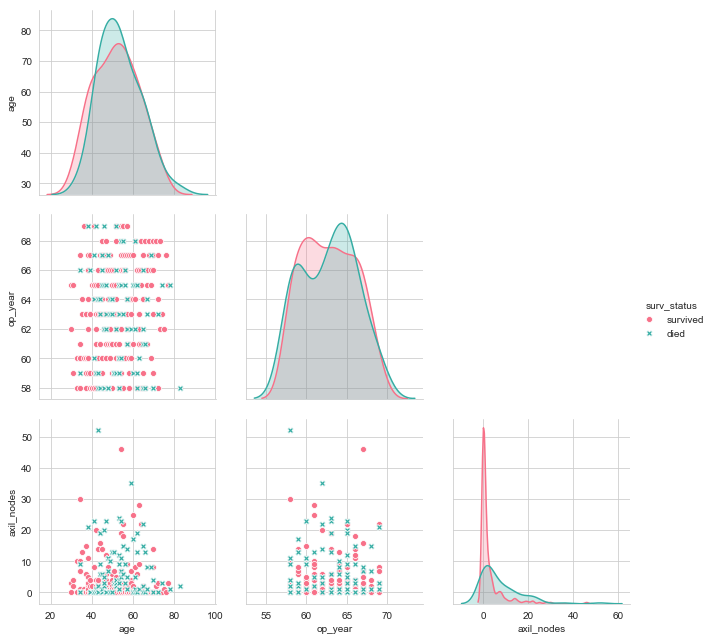

In [51]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
g=sns.pairplot(Haberman, hue="surv_status",size=3, palette="husl",markers=["o", "X"]);
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()
#  the diagnol elements are PDFs for each feature. 

## Observations :- 
It is clear from the pair plot that data is not linearly sperbale as the points are clattered and completly messed up , more over we could not identify important features using pair plot that will help in building classification model , no if-else model will help us in classification. But in Age vs Axil_nodes we see that age between 30-40 with axial nodes more than one peiople have survived

## Univariate Analysis ( pdf, cdf) and interpretation (1D analysis)

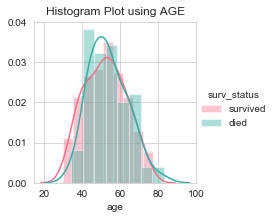

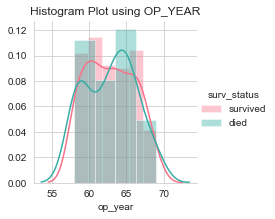

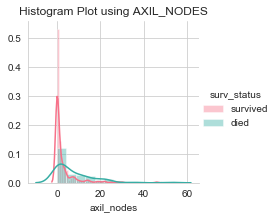

In [61]:
for idx,features in enumerate(Haberman.columns[:-1]):
    g=sns.FacetGrid(Haberman,hue = 'surv_status',size = 3,palette="husl").map(sns.distplot,features).add_legend()
    plt.title("Histogram Plot using "+ features.upper())
     plt.show()


## Observations:-
We have classwise-pdf (densties) for each variable , which is not so informative due to massive overlap, but from the pdf of number of axial_nodes we can say that the pdf for died has more variance than that of  pdf for survived or we may say died and survived has differnt average no axial nodes, it may be possible that this mean different could be due to chance or any other problem but the significant difference between can be tested using t-test... We can also say in case of age variable looking at pdf average age slightly differ but it can be tested again using t-test 

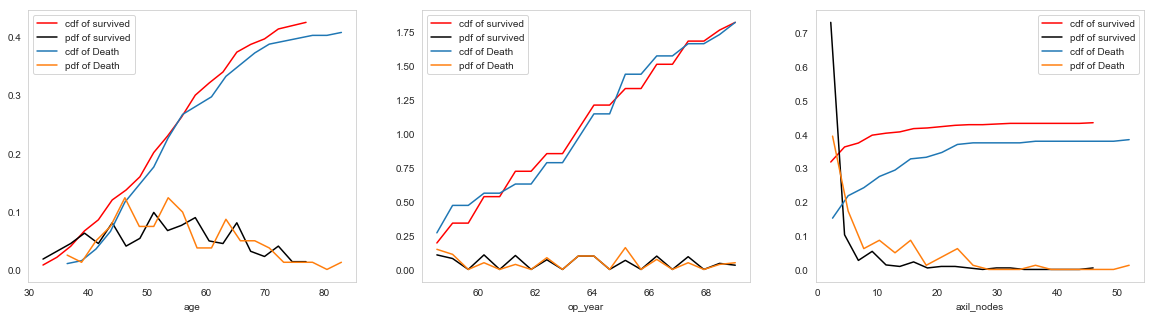

In [65]:
#Plot CDF 

Survived= Haberman.loc[Haberman["surv_status"]== "survived"]
Died = Haberman.loc[Haberman["surv_status"]=="died"]


plt.figure(figsize=(20,5))
i=1
for state in (list(Haberman.columns)[:-1]):
#survived
    plt.subplot(1,3,i)
    Counts , bin_edges = np.histogram(Survived[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of survived",color="red")
    plt.plot(bin_edges[1:],pdf,label="pdf of survived",color="black")

#Death
    Counts , bin_edges = np.histogram(Died[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of Death")
    plt.plot(bin_edges[1:],pdf,label="pdf of Death")
    plt.xlabel(state)
    plt.grid()
    plt.legend()
    i+=1
plt.show()


## Observations:
1) Patient with age between age 32-36 has definitly survived the operation and pataient aged 77-85 has definitly not survived the operation.

2) No insight of the patient survival status can be drawn form the year of operation as the data for both the case are evenly distrubuted along the year of operations. Excapt the patient who had undergone the surgery between 1961-1965 has slightly higher probablity of survival.

3) Also it has been seen that the patient with axil nodes < 22 has has higher probability of survival 

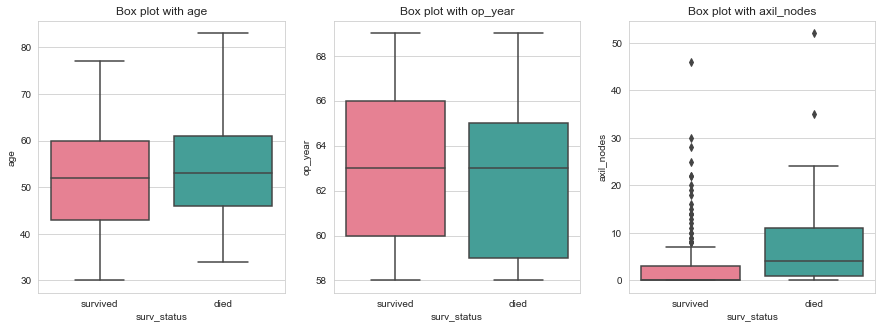

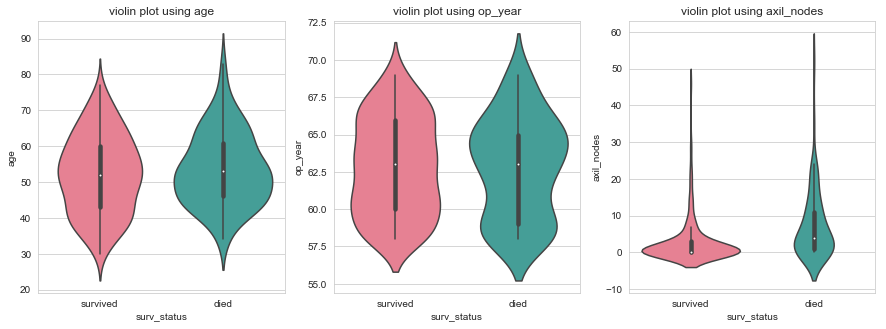

In [69]:
#Box plot with wishkers
fig,axes = plt.subplots(1,3,figsize = (15,5))
for idx, features in enumerate(Haberman.columns[:-1]):
    sns.boxplot(x = 'surv_status', y = features, data = Haberman, ax = axes[idx],palette="husl").set_title("Box plot with "+features)
plt.show()

#Violin Plot
fig,axes = plt.subplots(1,3,figsize = (15,5))
for idx, features in enumerate(Haberman.columns[:-1]):
    sns.violinplot(x = 'surv_status', y = features, data = Haberman, ax = axes[idx],palette="husl").set_title("violin plot using " +features)

plt.show()

## Observations :- 
From the box plots we can see the following 
- 1) Patient age between 30-45 can be classified as survived 
- 2) Nearly all Patient those who are operated befor year 1958-1960 has died and lot of operations has been carried out during 60-66
- 3) All paitents with no of Axil_nodes > 1 have died, As axial_nodes gets higher patients are likely to die


## Important Features
- Axil_nodes is most important feature in this dataset, as who had Axil node >= 1 those are more likely to die.

- Age is also somewhat important feature of this dataset, because we have seen that patients who aged less than 40 are likely to  survive inspite of having axil node >= 1

## Conclusion 
- 1) Given data is not linearly seperable that is we can not classify the surv_status using just a linear decision boundary
- 2) number of axil_nodes plays role of important features from EDA it is clear that number of axil_nodes is related to class variable surv_status.
- 3) age also plays somewhat important role 
- 4) If we transform these features into higher dimesion will be useful to classify may be possible to have linear seperation boundary 